<a href="https://colab.research.google.com/github/kotlanandu525/feature_selection/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
df=sns.load_dataset("taxis")
df


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
df.shape


(6433, 14)

In [ ]:
df.describe(

)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [ ]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [ ]:
df.describe(include="all")

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated

<bound method DataFrame.duplicated of                   pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]>

In [ ]:
df.isnull(

)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
df=df.drop_duplicates()


In [ ]:
df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


In [ ]:
df.shape


(6341, 14)

In [ ]:
df.reset_index(drop=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


/tmp/ipython-input-4250363326.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.tip,y=df.color,estimator='std',palette={'yellow':'yellow','green':'green'})


<Axes: xlabel='tip', ylabel='color'>

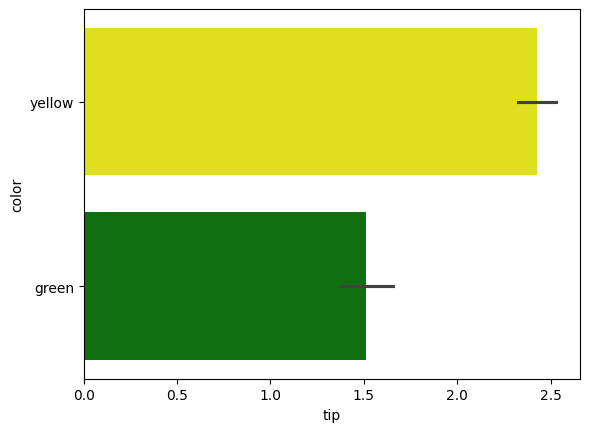

In [ ]:
sns.barplot(x=df.tip,y=df.color,estimator='std',palette={'yellow':'yellow','green':'green'})

In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


<Axes: xlabel='tip', ylabel='Count'>

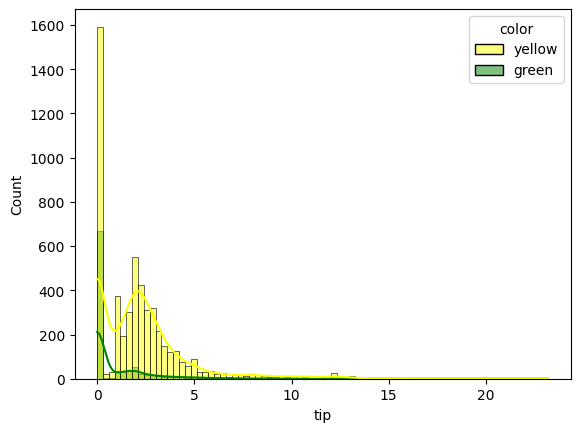

In [ ]:
sns.histplot(data=df, x=df['tip'], hue='color', kde=True,palette={'yellow':'yellow','green':'green'})

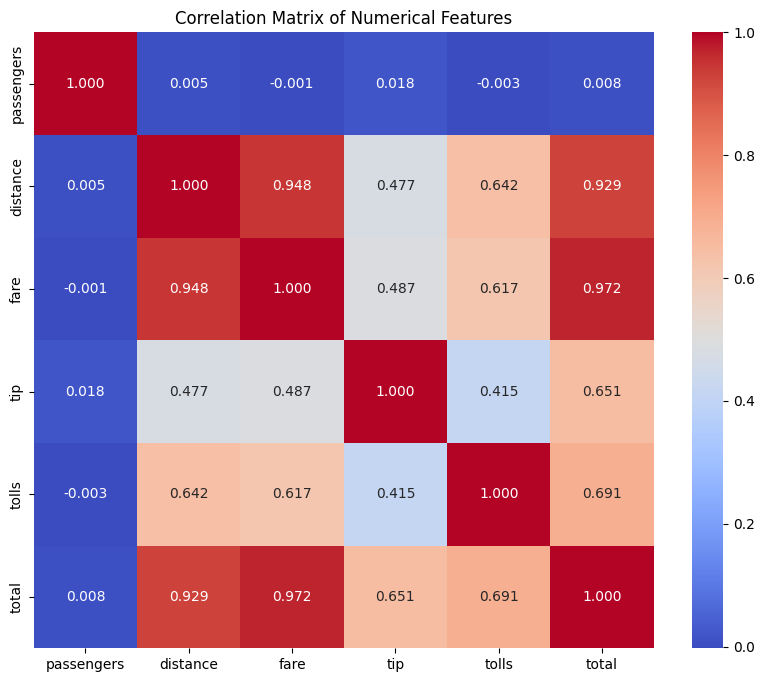

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
male_income=data[data['gender'=='male']]

In [ ]:
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']
yellow_tip

,tip
0,2.15
1,0.00
2,2.36
3,6.15
4,1.10
...,...
5446,2.66
5447,2.36
5448,2.56
5449,2.36


In [ ]:
green_tip

,tip
5451,0.00
5452,0.00
5453,1.20
5454,0.00
5455,0.00
...,...
6428,1.06
6429,0.00
6430,0.00
6431,0.00


In [ ]:
# T test
from scipy import stats
tval,pval=stats.ttest_ind(yellow_tip,green_tip)
print("tval=",tval,"pval=",pval)
if pval<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

tval= 17.05932566128597 pval= 7.791088119489451e-64
we reject null hypothesis


Ho=  tip through credit card and cash payment are different
H1=No significance difference between credit card and cash payment

In [ ]:
credit_card_tip=df['tip'][df['payment']=='credit card']
cash_tip=df['tip'][df['payment']=='cash']

In [ ]:
# T test
from scipy import stats
tval,pval=stats.ttest_ind(yellow_tip,green_tip)
print("tval=",tval,"pval=",pval)
if pval<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

tval= 49.09538452722153 pval= 0.0
we reject null hypothesis


/tmp/ipython-input-1002208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment,y=df.tip,estimator='std',palette={'credit card':'skyblue','cash':'red'})


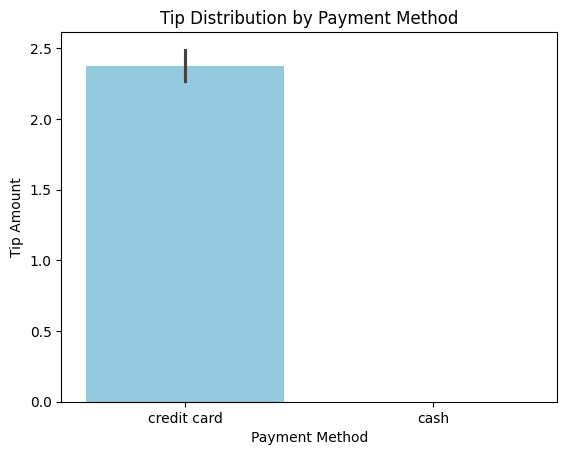

In [ ]:
sns.barplot(x=df.payment,y=df.tip,estimator='std',palette={'credit card':'skyblue','cash':'red'})
plt.title('std Tip Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.show()

/tmp/ipython-input-1002208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment,y=df.tip,estimator='std',palette={'credit card':'skyblue','cash':'red'})


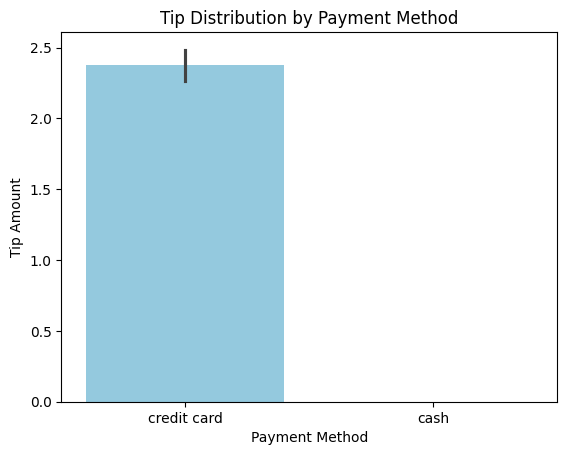

In [ ]:
sns.barplot(x=df.payment,y=df.tip,estimator='std',palette={'credit card':'skyblue','cash':'red'})
plt.title(' mean Tip Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.show()

<Axes: xlabel='tip', ylabel='Count'>

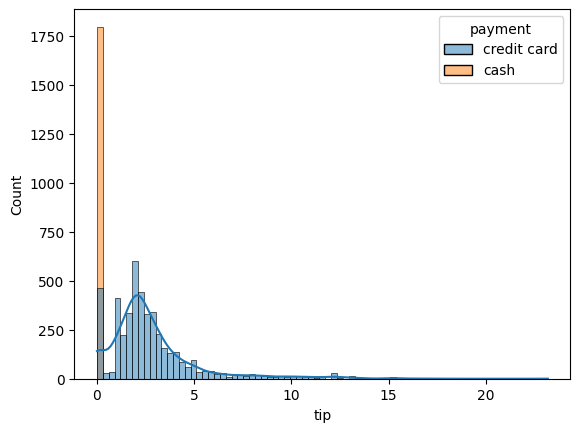

In [ ]:
sns.histplot(data=df, x=df['tip'], hue='payment', kde=True)

In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-85774069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_borough'],palette="Set2")


<Axes: xlabel='pickup_borough', ylabel='count'>

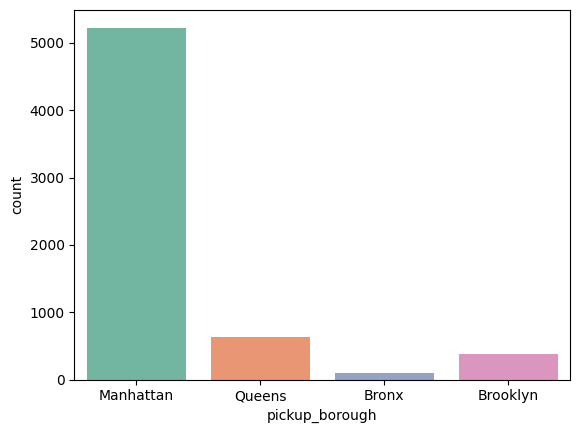

In [ ]:
sns.countplot(x=df['pickup_borough'],palette="Set2")

/tmp/ipython-input-2667310736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,data=df,estimator='std',palette="Set2")


<Axes: xlabel='pickup_borough', ylabel='tip'>

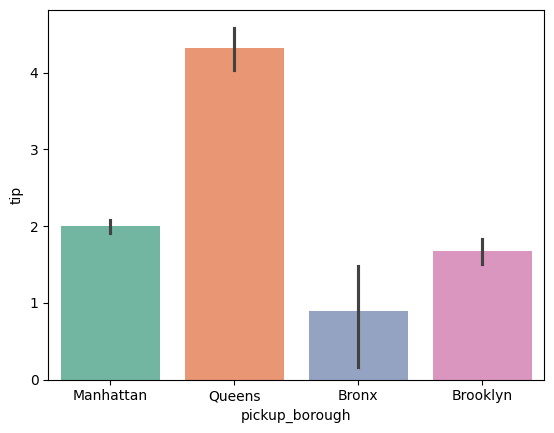

In [ ]:
sns.barplot(x=df.pickup_borough,y=df.tip,data=df,estimator='std',palette="Set2")

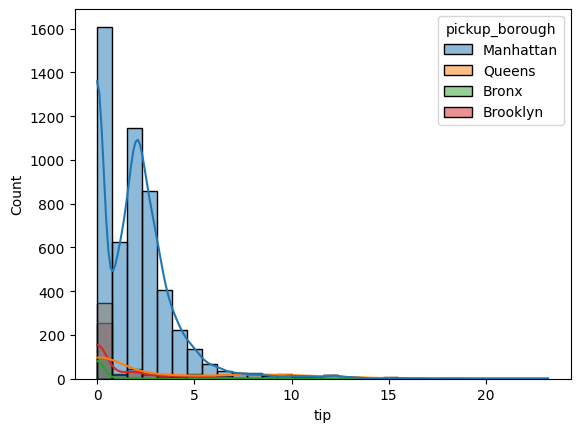

In [ ]:
sns.histplot( data=df,x=df['tip'], hue='pickup_borough', kde=True,bins=30)
plt.show()

Ho=ditribution of tips across all pickup_borrough categories is same
H1=atleast one category is diffrerent

In [ ]:
manhattan_tips = df[df['pickup_borough'] == 'Manhattan']['tip']
brooklyn_tips = df[df['pickup_borough'] == 'Brooklyn']['tip']
queens_tips = df[df['pickup_borough'] == 'Queens']['tip']
bronx_tips = df[df['pickup_borough'] == 'Bronx']['tip']
stat, p_value = stats.f_oneway(manhattan_tips, brooklyn_tips, queens_tips, bronx_tips)
print("F-statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in tips across pickup_borough categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in tips across pickup_borough categories.")


F-statistic: 91.57933831850565
p-value: 5.155109332422435e-58
Reject the null hypothesis. There is a significant difference in tips across pickup_borough categories.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['tip'], groups=df['pickup_borough'], alpha=0.05)

print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


The output of the Tukey HSD test above shows pairwise comparisons between the mean tip amounts for each `pickup_borough`.

*   **`meandiff`**: The difference between the means of the two groups being compared.
*   **`p-adj`**: The adjusted p-value for the comparison. If `p-adj` < 0.05, the difference between the means is statistically significant.
*   **`lower`** and **`upper`**: The lower and upper bounds of the 95% confidence interval for the mean difference.
*   **`reject`**: Indicates whether the null hypothesis (that the means are equal) is rejected for that pair. If `True`, there's a significant difference.

In [ ]:
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


/tmp/ipython-input-2205789118.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dropoff_borough'],palette="Set2")


<Axes: xlabel='dropoff_borough', ylabel='count'>

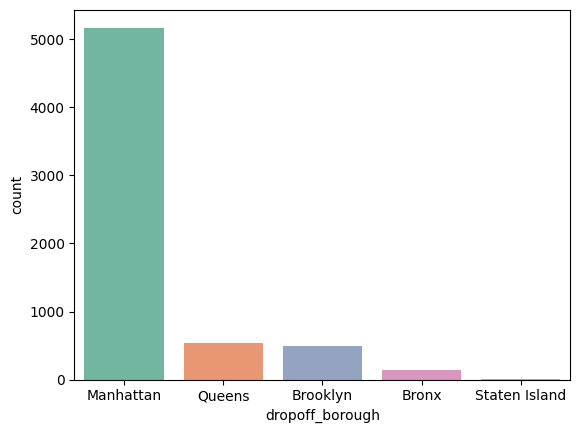

In [ ]:
sns.countplot(x=df['dropoff_borough'],palette="Set2")

/tmp/ipython-input-409718859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.dropoff_borough,y=df.tip,data=df,estimator='std',palette="Set1")


<Axes: xlabel='dropoff_borough', ylabel='tip'>

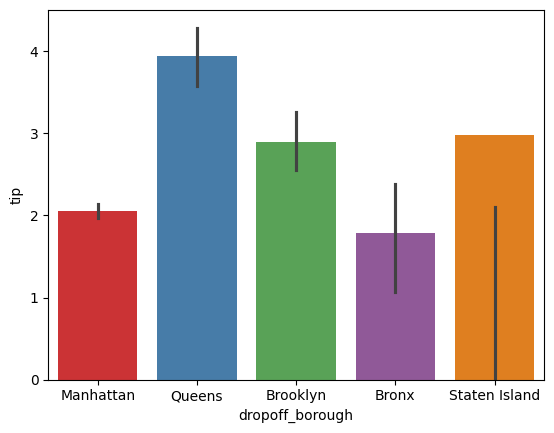

In [ ]:
sns.barplot(x=df.dropoff_borough,y=df.tip,data=df,estimator='std',palette="Set1")

In [ ]:
#hypothesis testing
manhattan_tips = df[df['dropoff_borough'] == 'Manhattan']['tip']
brooklyn_tips = df[df['dropoff_borough'] == 'Brooklyn']['tip']
queens_tips = df[df['dropoff_borough'] == 'Queens']['tip']
bronx_tips = df[df['dropoff_borough'] == 'Bronx']['tip']
staten_island_tips = df[df['dropoff_borough'] == 'Staten Island']['tip']
stat, p_value = stats.f_oneway(manhattan_tips, brooklyn_tips, queens_tips, bronx_tips, staten_island_tips)
print("F-statistic:", stat)
print("p-value:", p_value)
if p_value<0.05:
  print("accept null")
else:
  print("reject null")

F-statistic: 31.424177966968287
p-value: 5.87859571331583e-26
accept null


In [ ]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['tip'], groups=df['dropoff_borough'], alpha=0.05)

print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


H0=correlatiion is zero
H1= there is significant correlation(not zero)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print("correlation",r)
print("p_value",p_val)
if p_val<0.05:
  print("reject null")
else:
  print("accept null")


correlation 0.027509812818779178
p_value 0.028480753176042872
reject null


/tmp/ipython-input-2759036577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.passengers,y=df.tip,data=df,estimator='std',palette="Set1")


<Axes: xlabel='passengers', ylabel='tip'>

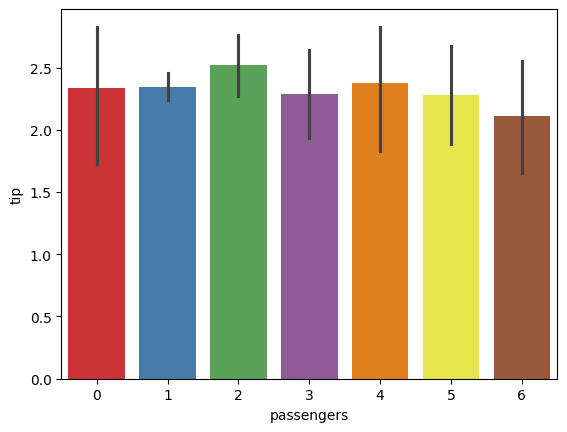

In [ ]:
sns.barplot(x=df.passengers,y=df.tip,data=df,estimator='std',palette="Set1")

<Axes: xlabel='total', ylabel='Count'>

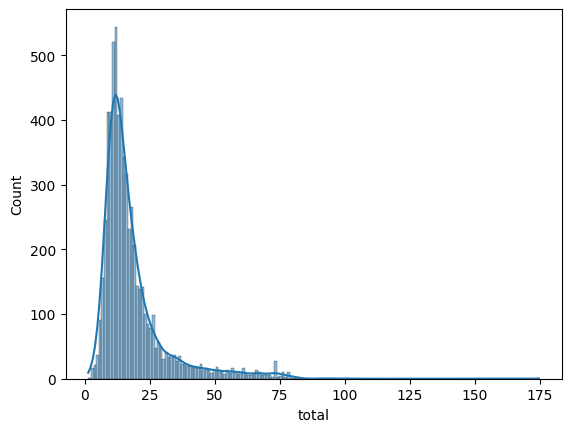

In [ ]:
sns.histplot(x=df['total'],kde=True)

In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['total'])
print("correlation",r)
print("p_value",p_val)
if p_val<0.05:
  print("reject null")
else:
  print("accept null")

correlation 0.5028299699182296
p_value 0.0
reject null


In [ ]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print("correlation",r)
print("p_value",p_val)
if p_val<0.05:
  print("reject null")
else:
  print("accept null")

correlation 0.175380002891528
p_value 5.643276180955435e-45
reject null
